In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv('movie_metadata.csv')
print movie.shape
movie.head()

(5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie = movie.dropna()
del movie['movie_title']
del movie['movie_imdb_link']
print movie.shape
movie.head()

(3756, 26)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


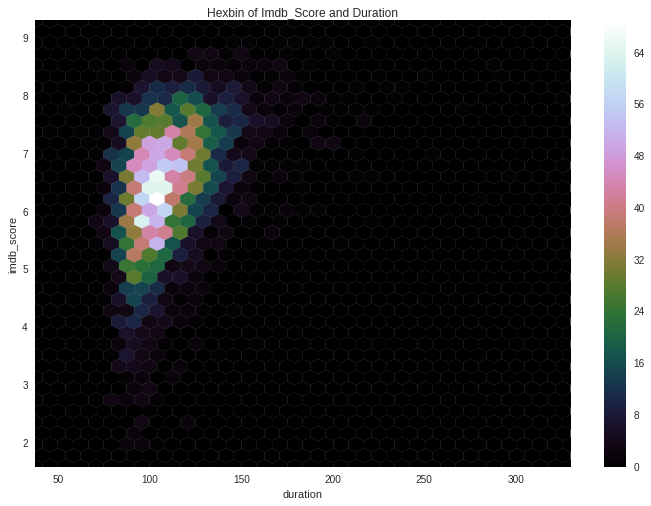

In [4]:
movie.plot(y = 'imdb_score', x = 'duration', kind = 'hexbin', gridsize = 35, sharex = False, colormap = 'cubehelix', title = 'Hexbin of Imdb_Score and Duration',figsize = (12,8))
plt.show()

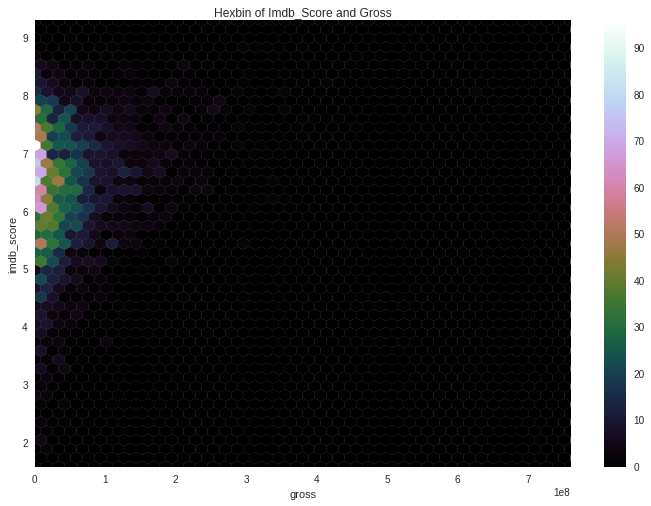

In [5]:
movie.plot(y = 'imdb_score', x = 'gross',kind = 'hexbin',gridsize = 45, sharex = False, colormap = 'cubehelix', title = 'Hexbin of Imdb_Score and Gross',figsize = (12,8))
plt.show()

In [6]:
clone_movie = movie.copy()

for i in xrange(movie.shape[1]):
    if str(type(movie.iloc[0, i])).find('str') >= 0:
        print 'column: ' + str(i) + ', unique:' + str(np.unique(movie.iloc[:, i]).shape[0])
        movie.iloc[:, i] = LabelEncoder().fit_transform(movie.iloc[:, i])

column: 0, unique:2
column: 1, unique:1659
column: 6, unique:2188
column: 9, unique:745
column: 10, unique:1428
column: 13, unique:2587
column: 15, unique:3656
column: 17, unique:34
column: 18, unique:45
column: 19, unique:12


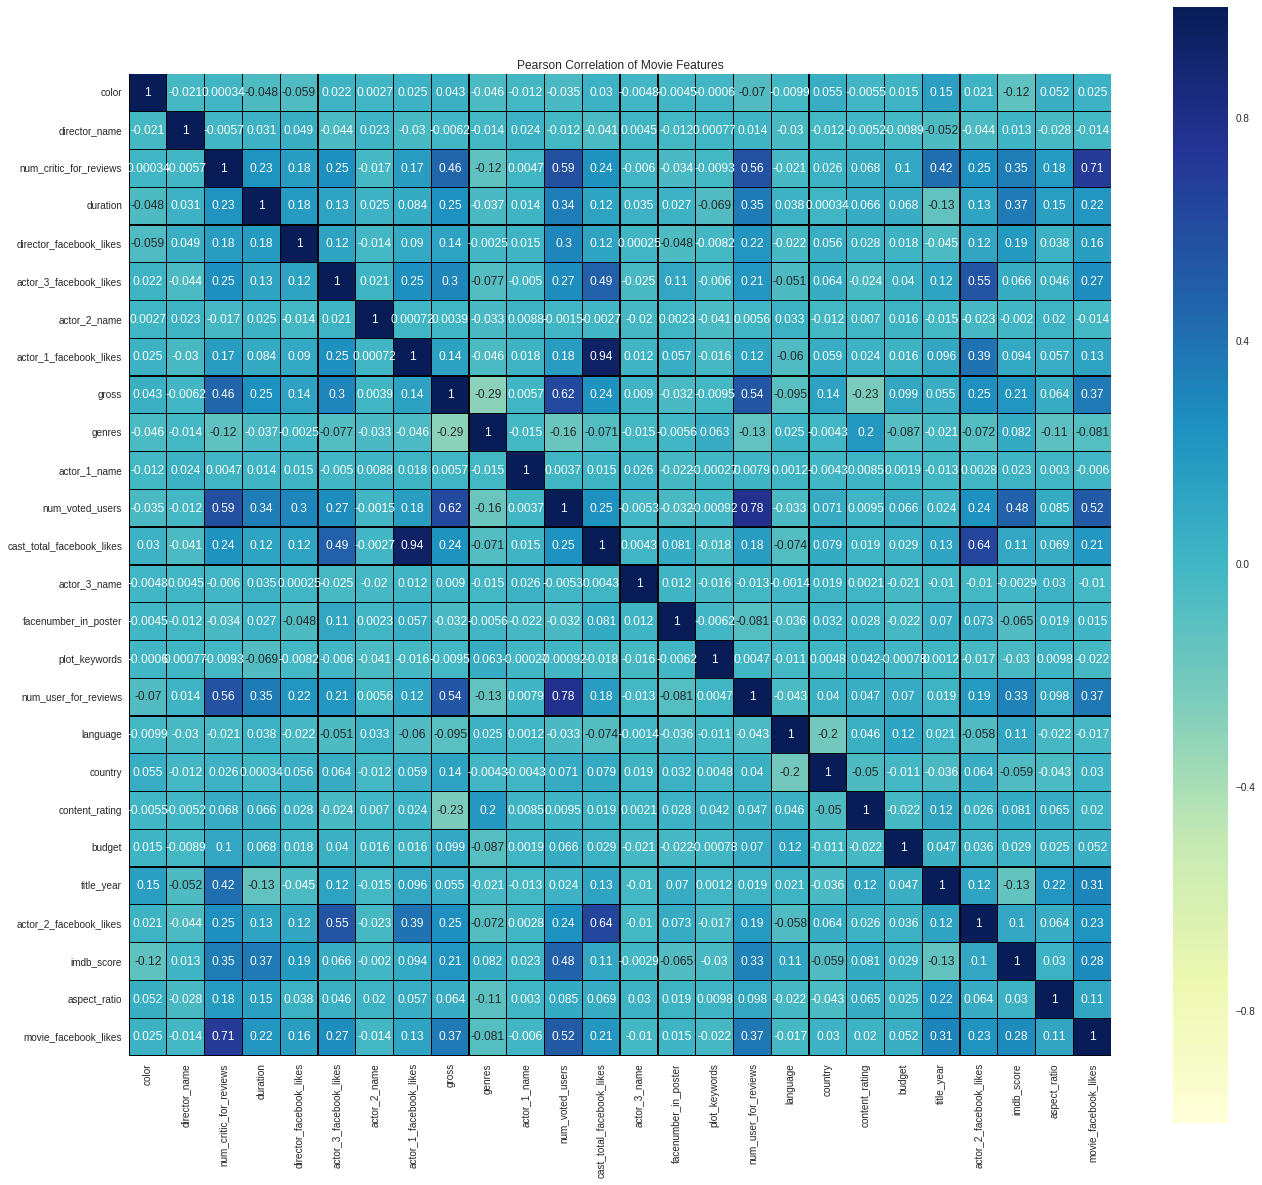

In [7]:
f, ax = plt.subplots(figsize = (22, 20))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie.astype(float).corr(),linewidths = 0.25,vmax = 1.0, square = True, cmap = "YlGnBu", linecolor = 'black', annot = True)
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
movie_std = StandardScaler().fit_transform(movie)

In [12]:
mean_vec = np.mean(movie_std, axis = 0)
cov_mat = (movie_std - mean_vec).T.dot((movie_std - mean_vec)) / (movie_std.shape[0] - 1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [16]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
for i in eig_pairs:
    print i[0]

4.48292949222
2.17953202896
1.58787939255
1.50443290771
1.24667358915
1.10986704183
1.05041869593
1.02739485734
0.99689379621
0.994821920484
0.97396166959
0.966357999825
0.936689451312
0.906371528519
0.870182971745
0.816064912292
0.777829972557
0.737299935419
0.629469517087
0.579433917239
0.460673117569
0.414191812698
0.368306662749
0.239510264171
0.147974583349
0.00176206269795


In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

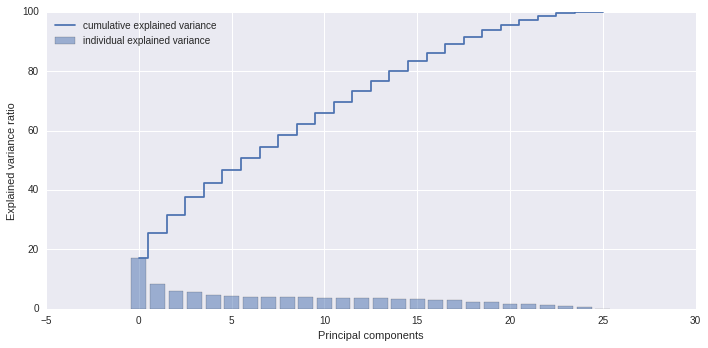

In [24]:
plt.figure(figsize = (10, 5))
plt.bar(range(len(eig_pairs)), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(len(eig_pairs)), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

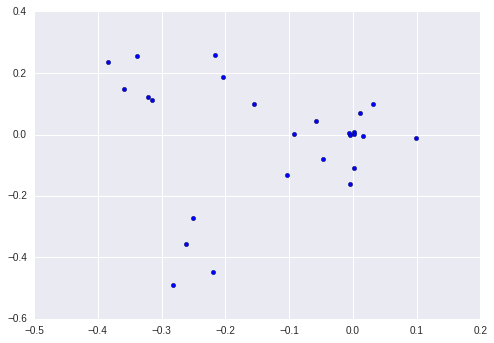

In [30]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(len(eig_pairs), 1),
                      eig_pairs[1][1].reshape(len(eig_pairs), 1)))

plt.scatter(matrix_w[:, 0], matrix_w[:, 1])
plt.show()

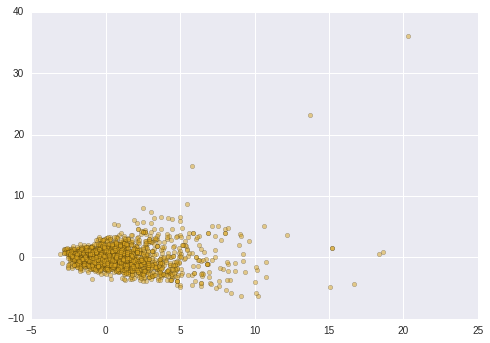

In [32]:
x_9d = PCA(n_components = 9).fit_transform(movie_std)
plt.scatter(x_9d[:,0], x_9d[:,1], c = 'goldenrod', alpha = 0.5)
plt.show()

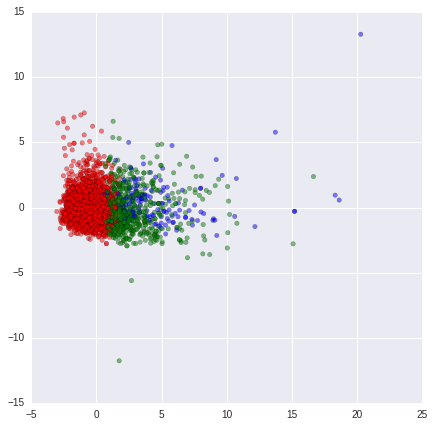

In [33]:
kmeans = KMeans(n_clusters = 3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

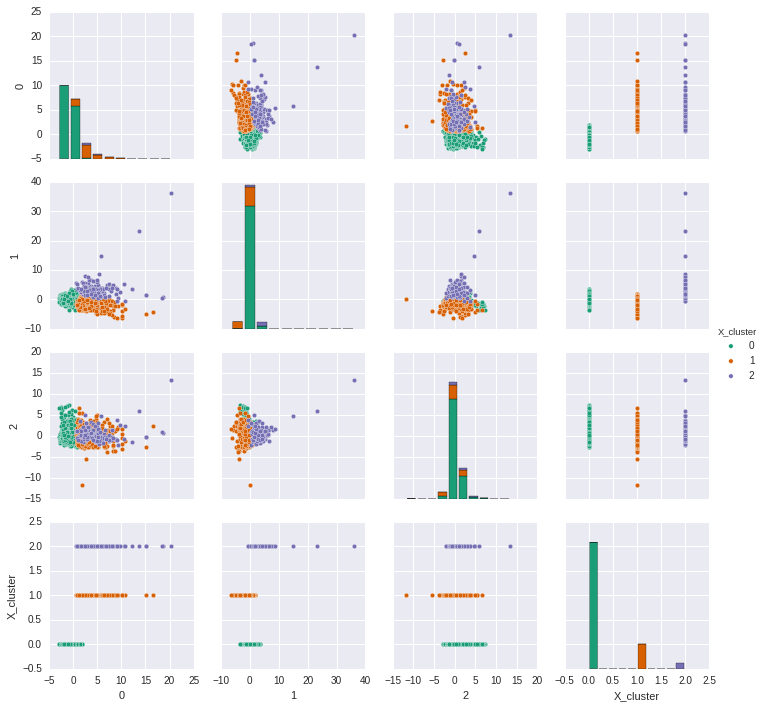

In [41]:
df = pd.DataFrame(x_9d)
df = df[[0,1,2]]
df['X_cluster'] = X_clustered
sns.pairplot(df, hue = 'X_cluster', palette = 'Dark2')
plt.show()